In [53]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score as r2s
from sklearn.metrics import mean_squared_error as mse

In [54]:
#importing data
data = pd.read_csv(
    '/kaggle/input/incurrence/insurance.csv')

In [55]:
#let's take a look at our data 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
data.shape

(1338, 7)

In [57]:
#Getting some inof about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### I : Data Pre-processing

#### 1: Data Visualization 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


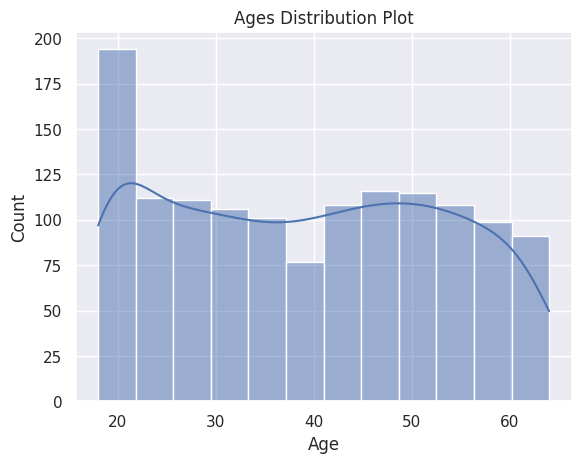

In [58]:
#Age distribution plot 

sns.set()
# Create a distribution plot
sns.histplot(data['age'] , kde = True)

# Add labels and title (optional)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages Distribution Plot')

# Show the plot
plt.show()

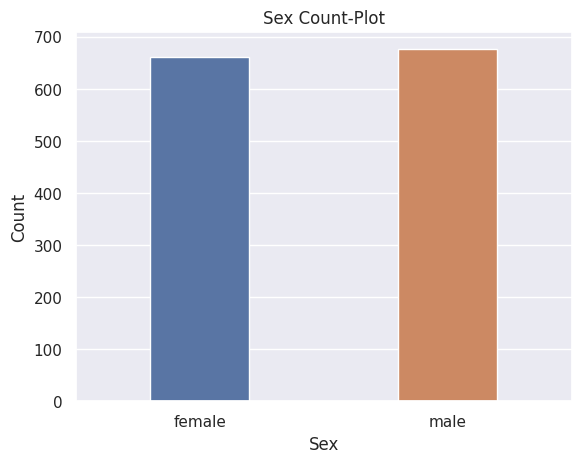

In [59]:
#Sex distribution plot 

sns.countplot(data = data , x = data['sex'] ,width = 0.4 )

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count-Plot')

# Show the plot
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


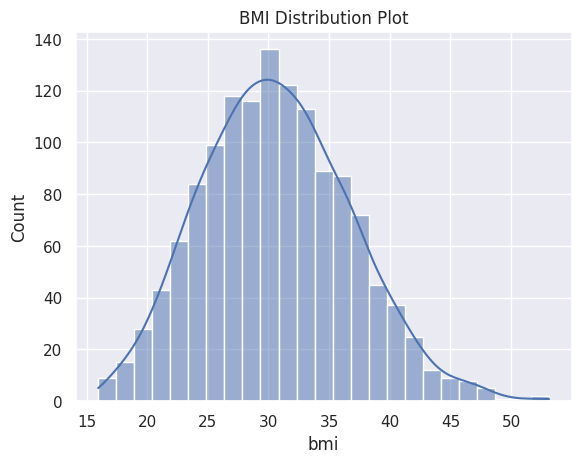

In [60]:
#BMI distribution plot 

# Create a distribution plot
sns.histplot(data['bmi'] , kde = True)

# Add labels and title (optional)
plt.xlabel('bmi')
plt.ylabel('Count')
plt.title('BMI Distribution Plot')

# Show the plot
plt.show()

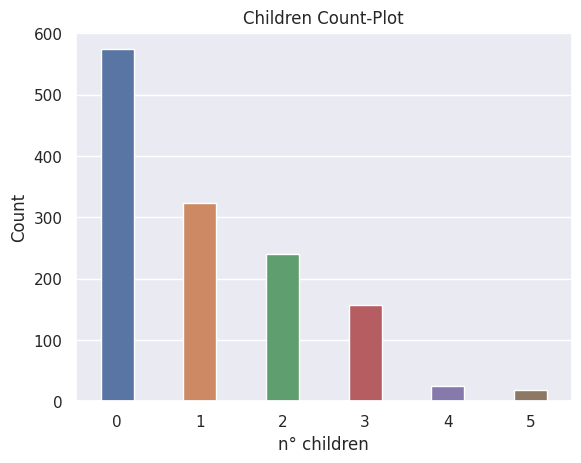

In [61]:
#Children distribution plot 

sns.countplot(data = data , x = data['children'] ,width = 0.4 )

plt.xlabel('n° children')
plt.ylabel('Count')
plt.title('Children Count-Plot')

# Show the plot
plt.show()

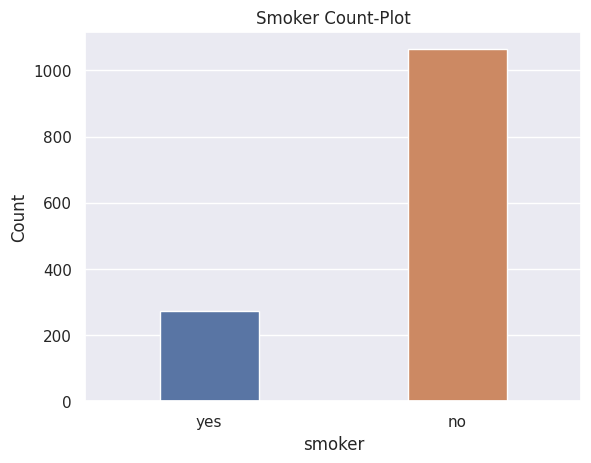

In [62]:
#Smoker distribution plot 

sns.countplot(data = data , x = data['smoker'] ,width = 0.4 )

plt.xlabel('smoker')
plt.ylabel('Count')
plt.title('Smoker Count-Plot')

# Show the plot
plt.show()

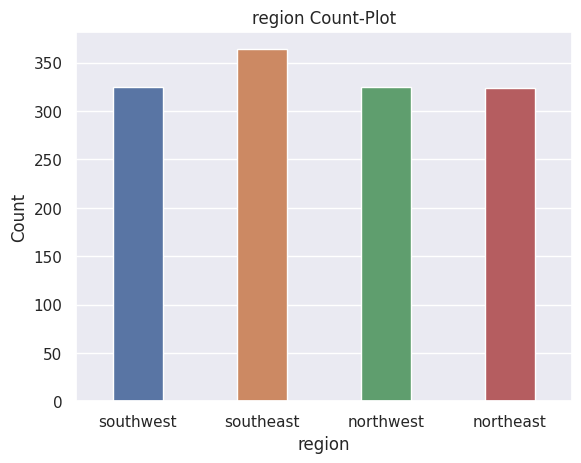

In [63]:
#Region distribution plot 

sns.countplot(data = data , x = data['region'] ,width = 0.4 )

plt.xlabel('region')
plt.ylabel('Count')
plt.title('region Count-Plot')

# Show the plot
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


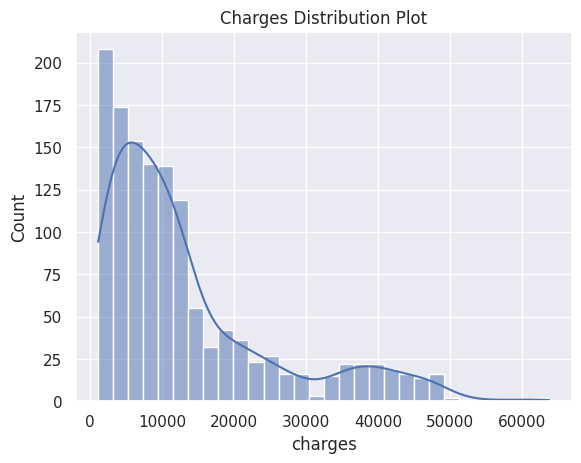

In [64]:
#Charges distribution plot 

# Create a distribution plot
sns.histplot(data['charges'] , kde = True)

# Add labels and title (optional)
plt.xlabel('charges')
plt.ylabel('Count')
plt.title('Charges Distribution Plot')

# Show the plot
plt.show()

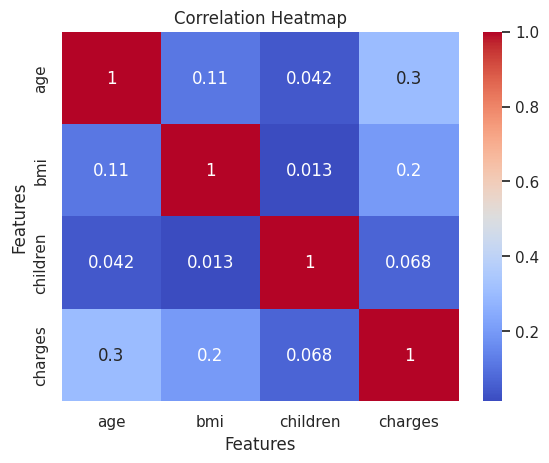

In [65]:
# Correlation heatmap (numeric columns only)
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
#Data encoding : 

data.replace({'region' : {'southeast' : 0,'southwest' : 1 , 'northeast' : 2 , 'northwest' : 3}} , inplace = True)
data.replace({'smoker' : {'yes' : 0 , 'no' : 1}} , inplace =True)
data.replace({'sex' : {'male' : 0 , 'female' : 1}} , inplace = True)

/tmp/ipykernel_36/3809182677.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'region' : {'southeast' : 0,'southwest' : 1 , 'northeast' : 2 , 'northwest' : 3}} , inplace = True)
/tmp/ipykernel_36/3809182677.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker' : {'yes' : 0 , 'no' : 1}} , inplace =True)
/tmp/ipykernel_36/3809182677.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

In [67]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [68]:
#Splitting our data
x = data.drop(['charges'],axis=1)
y = data['charges']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [69]:
#Train our model 
lin = LinearRegression()

#Fitting our model 

lin.fit(x_train , y_train)

LinearRegression()

In [70]:
lin.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [71]:
coefficients = lin.coef_
intercept = lin.intercept_

# Print the coefficients and intercept
print("Coefficients (Beta values):", coefficients)
print("Intercept (Beta_0 value):", intercept)

Coefficients (Beta values): [   251.40512196     26.11715966    330.64637157    580.27438296
 -23928.10171061    212.22242728]
Intercept (Beta_0 value): 11357.668742540953


In [72]:
#Testing with trained alues 
y_pred = lin.predict(x_train)

In [73]:
#evaluating 
err = r2s(y_train , y_pred)
err

0.751505643411174

In [74]:
#evaluating 
err = mse(y_train , y_pred)
err

36174978.427092075

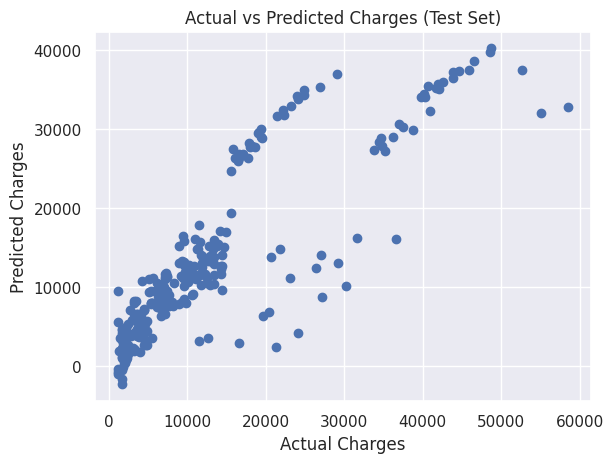

In [75]:
# Predict test set results if not already done
y_test_pred = lin.predict(x_test)

plt.scatter(y_test, y_test_pred)

# Add labels and a title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Test Set)')
plt.show()

In [76]:
y_test_pred = lin.predict(x_test)

In [77]:
err = r2s(y_test , y_test_pred)
err

0.7447273869684076

Text(0.5, 1.0, 'Scatter Plot Example')

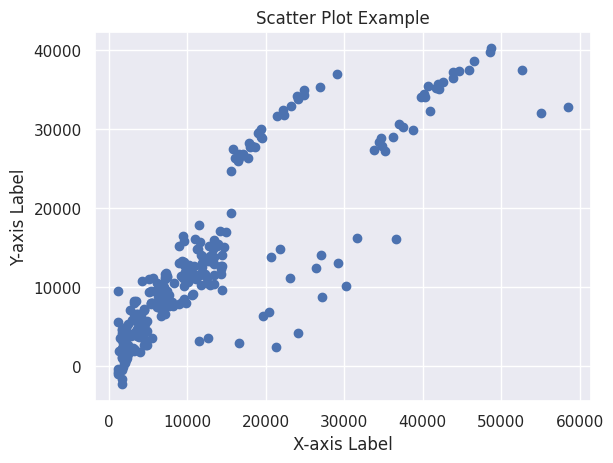

In [78]:
plt.scatter(y_test, y_test_pred)

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')